## **Introduction**

In this era, many people choose to use ride-hailing services because it allows users to utilize their travel time for other activities. This trend became the background for the formation of Uber and Lyft. Uber and Lyft are companies that provide transportation services through mobile applications. Since the pricing structure of both platforms is dynamic, an analysis was conducted to identify and predict the factors that influence these fluctuations, which was achieved through linear regression.

To facilitate this investigation, a dataset sourced from Kaggle was used, which contains information extracted from the Uber and Lyft apps. This dataset consists of 693,071 rows and 57 columns. The model developed for this project will be implemented using Streamlit.

The dataset used is a good dataset for linear regression modeling to observe patterns in the features that have the most influence on Uber and Lyft pricing. We formulate a problem regarding the most significant factors affecting Uber and Lyft pricing. In this case, we use correlation analysis, where low correlations are eliminated to achieve more accurate predictions.

## **Import Libraries**

The libraries needed to bulid a linear regression model include numpy, pandas, sympy, seaborn, matplotlib, dython nominal, joblib, and sklearn.

In [58]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from dython.nominal import associations
from joblib import dump
import pickle

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from wordcloud import WordCloud,STOPWORDS

## **Data Loading**

Import *rideshare_kagle.csv* as *df*. So, the required dataset will be read by the program.

In [59]:
df = pd.read_csv("E:/Python/Stupen-Hacktiv8/rideshare_kaggle.csv")

Show the data that has been imported

In [60]:
pd.set_option("display.max.columns", None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

Summarize the information about DataFrame

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Summarize the descriptive statistics from DataFrame

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Describe specific of statistics to object columns

In [63]:
df.describe(include='object').T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


Check Missing Values

In [64]:
df.isnull().sum()[df.isnull().sum() > 0]

price    55095
dtype: int64

Check Duplicated Data

In [65]:
df.duplicated().sum()

0

Unique Values

In [66]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## **Data Cleaning**

There are *NaN* values in the dataframe, more precisely in the price column. Then, replace *NaN* Values in the price column with its mean

In [67]:
df["price"] = df["price"].fillna(df["price"].mean())

There are some columns irrelevant. So remove the following features, such as:
- *id*: It's unique for every row
- *datetime*: It's already been represented by hour, day, and month columns
- *timestamp*: It's similar to datetime column
- *timezone*: There's only one timezone within the dataframe

In [68]:
df = df.drop(["id","timestamp","datetime","timezone"],axis=1)

Remove outliers in *price* column with IQR method

In [69]:
price_q1 = df["price"].describe().loc["25%"]
price_q3 = df["price"].describe().loc["75%"]
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df_without_outliers = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

Find correlation between numerical and categorical variables with the help of *dython* library

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


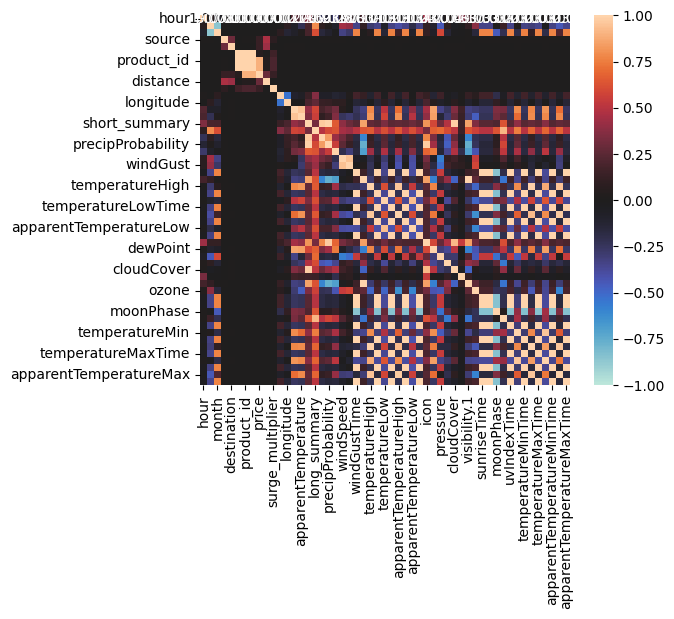

In [70]:
from dython.nominal import associations

corr = associations(df_without_outliers)

Because we want to know which features that affect the price the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order and take only the top 5. The + and - signs only indicate the direction of the linear relationship between two variables, thus we can sort by the absolute values of the correlation coefficients to make sorting easier.

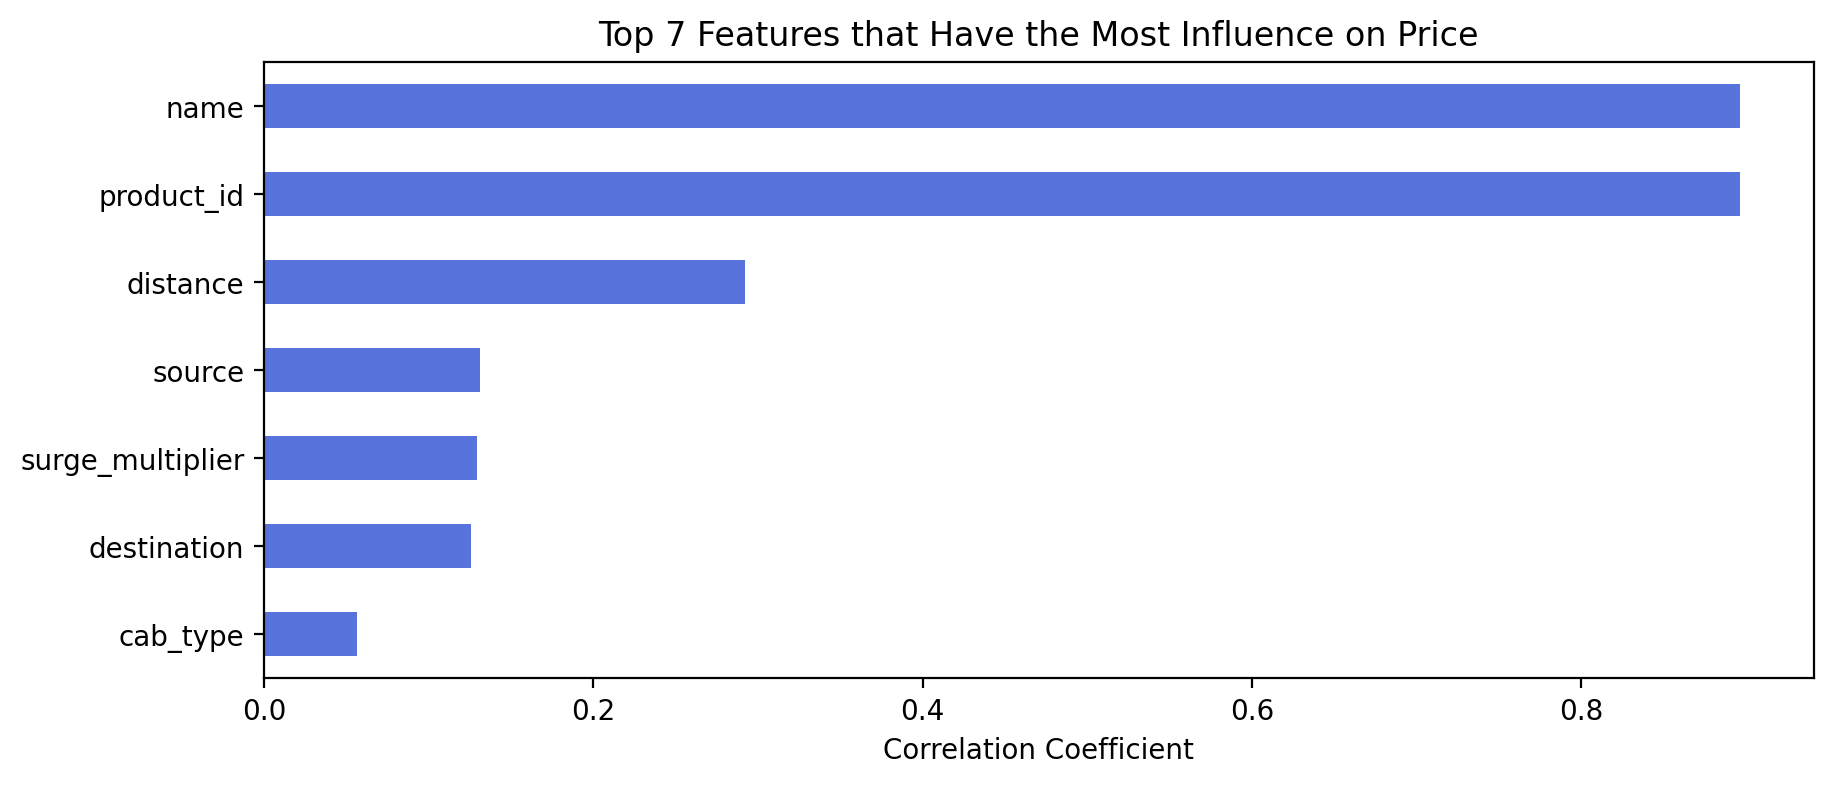

In [71]:
top_7_corr = abs(corr["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(7)

fig = plt.figure(figsize=(10,4),dpi=200)
top_7_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Top 7 Features that Have the Most Influence on Price")
plt.xlabel("Correlation Coefficient")
plt.show()

Since we've already known what are the top 17 features that affect the price the most, then we'll sice the dataframe based on those 7 features

In [72]:
df_without_outliers = df_without_outliers[list(top_7_corr.index) + ["price"]]
df_without_outliers.head()

,product_id,name,distance,source,surge_multiplier,destination,cab_type,price
0,lyft_line,Shared,0.44,Haymarket Square,1.0,North Station,Lyft,5.0
1,lyft_premier,Lux,0.44,Haymarket Square,1.0,North Station,Lyft,11.0
2,lyft,Lyft,0.44,Haymarket Square,1.0,North Station,Lyft,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Haymarket Square,1.0,North Station,Lyft,26.0
4,lyft_plus,Lyft XL,0.44,Haymarket Square,1.0,North Station,Lyft,9.0


In [73]:
print(df.shape)
df.head()

(693071, 53)


,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## **Exploratory Data Analysis**

Analyze and visualize the distribution of ride costs on Uber and Lyft.

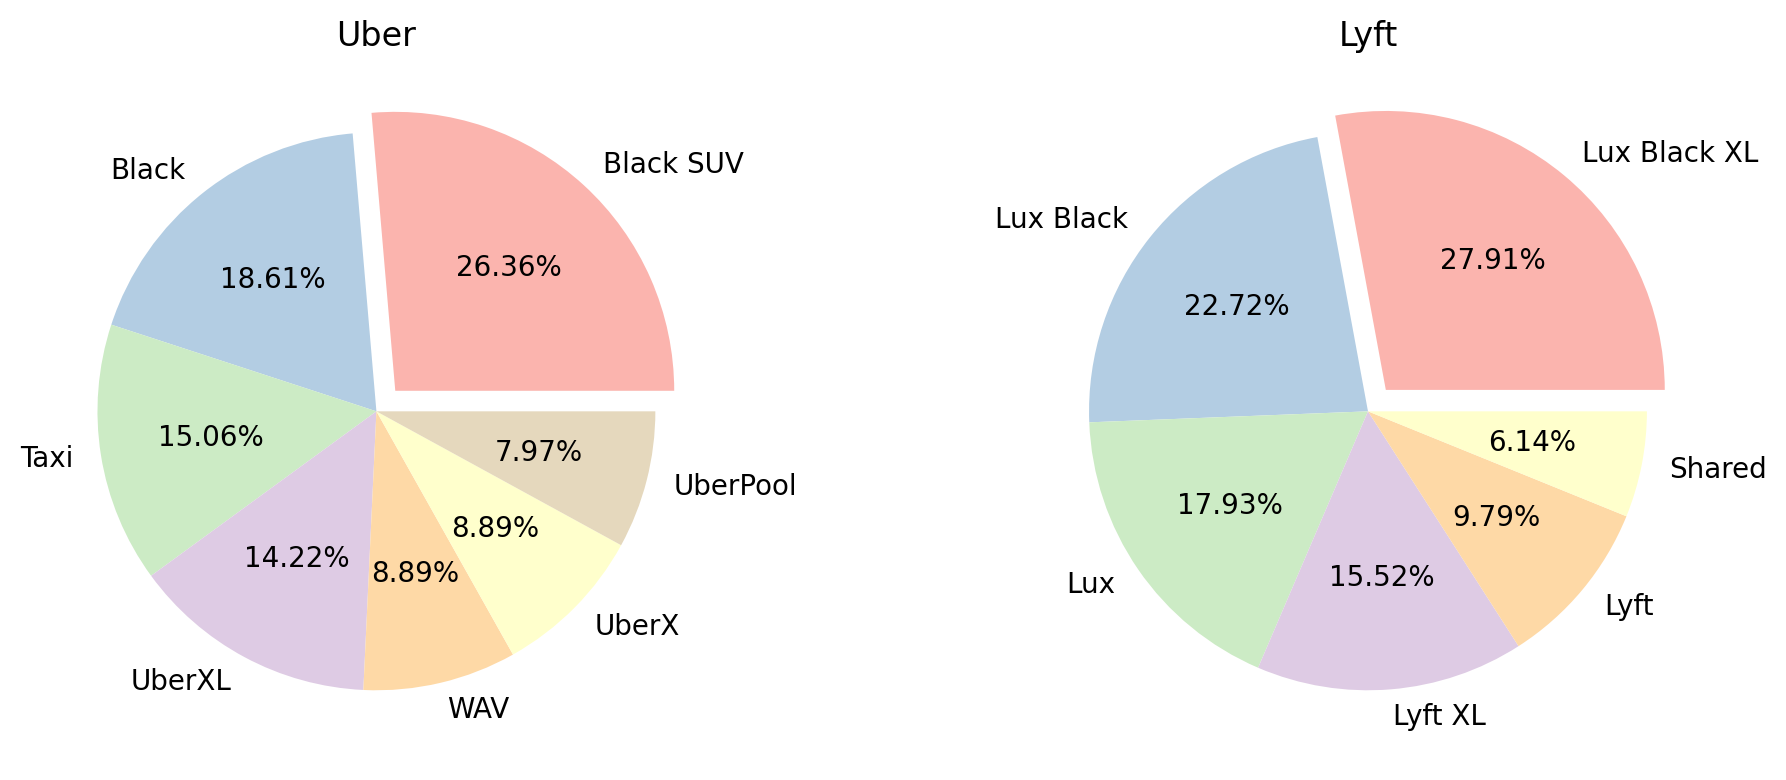

In [74]:
uber_name = df_without_outliers[df_without_outliers["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft_name = df_without_outliers[df_without_outliers["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=1,ncols=2)

ax[0].pie(uber_name["price"],labels=uber_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[0].set_title("Uber")

ax[1].pie(lyft_name["price"],labels=lyft_name.index,autopct="%.2f%%",explode=[0.1,0,0,0,0,0],colors=sns.color_palette("Pastel1"))
ax[1].set_title("Lyft")

plt.tight_layout()
plt.show()

From piechart above, it can be concluded that Black SUV type is more ordered in Uber with a total of order is 26.36%, and the least oredered in Uber is UberPool with a total of order is 7.97%. Meanwhile, the most ordered at Lyft is Lux Black XL with a total of order is 27.91%, and the least ordered is Shared with a total of order is 6.14%

#### **Which One is More Popular?** ###

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


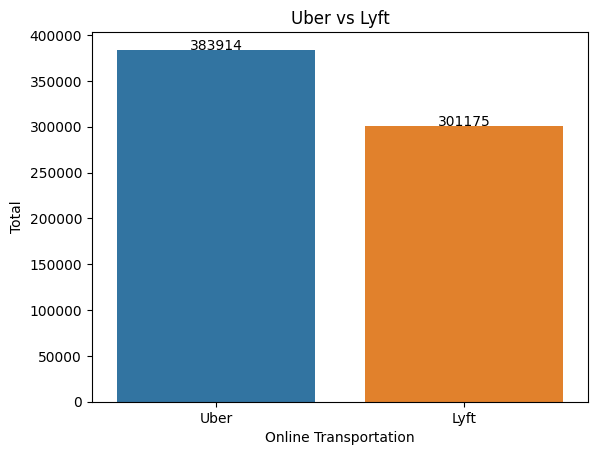

In [75]:
# Membuat variabel df_transport_name berisi total data dari kolom transport_name
df_transport_name = df_without_outliers['cab_type'].value_counts()
df_transport_name = pd.DataFrame(df_transport_name).reset_index()
x = df_transport_name['cab_type']
y = df_transport_name['count']

# Memvisualisasikan kolom transport_name dalam bentuk bar charts
ax = sns.barplot(x=x, y=y)
plt.xlabel('Online Transportation')
plt.ylabel('Total')
plt.title('Uber vs Lyft')
for i, v in enumerate(y):
   ax.text(i, v + 0.2, str(v), ha='center')
plt.show()

From the barchart above, we can see if Uber is more popular than Lyft, with a total of 383914 passangers and Lyft with a total of 301175 passangers.

#### **Place with Most Pick-Ups (Source and Destination)** ###

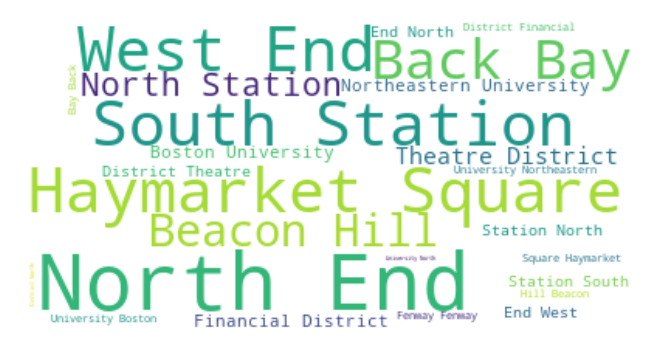

In [76]:
stopwords = set(STOPWORDS)
plt.figure(figsize=(4,4),dpi=200)
source_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df_without_outliers['source']))
plt.imshow(source_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

It can be seen from the wordcloud above that North End has the most pick-up points, as it is the largest word in the wordcloud.

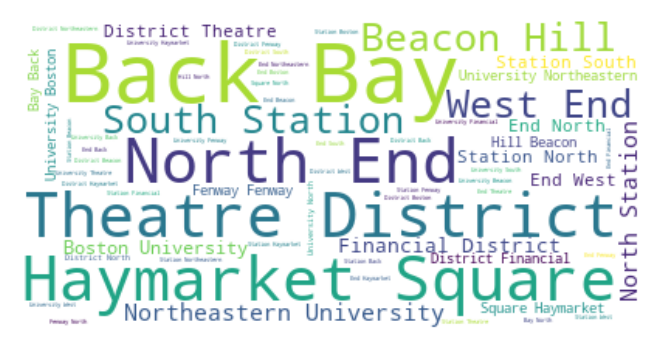

In [77]:
stopwords = set(STOPWORDS)

plt.figure(figsize=(4,4),dpi=200)
destination_wordcloud = WordCloud(background_color='white',
                             stopwords=stopwords).generate(' '.join(df_without_outliers['destination']))
plt.imshow(destination_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

It can be seen from the wordcloud above that Back Bay is the most drop-off point, because the word is the largest in the wordcloud.

#### **How Distances Affect Price** 

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

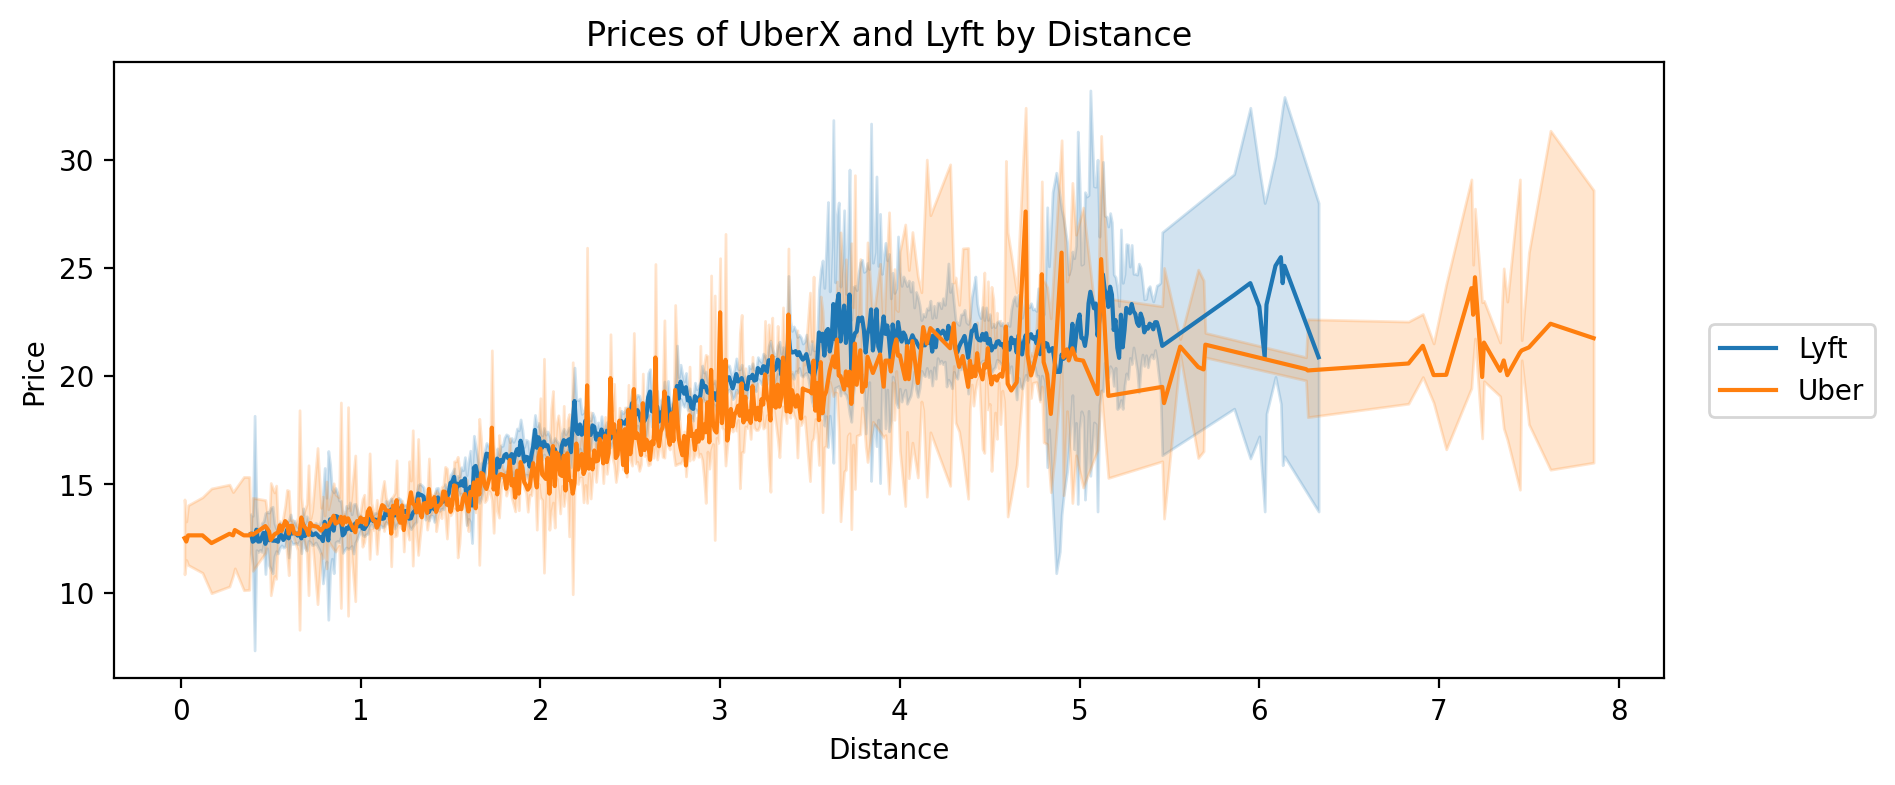

In [78]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df_without_outliers,x="distance",y="price",hue="cab_type")
plt.title("Prices of UberX and Lyft by Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

Based on the graph above, it can be seen that the greater the distance traveled by Uber and Lyft, the greater the fare. Lyft has a higher fare than Uber even though the distance traveled is less than Uber. This means that there is a correlation between the distance traveled and the fare.

#### **Does Cab Type Influence Surge Multiplier Price?**

In [79]:
surge_price = df_without_outliers.pivot_table(index='surge_multiplier', columns=['name', 'cab_type'], values='price', fill_value=0)
surge_price.index = surge_price.index.map(int)
surge_price

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
cab_type,Uber,Uber,Lyft,Lyft,Lyft,Lyft,Lyft,Lyft,Uber,Uber,Uber,Uber,Uber
surge_multiplier,,,,,,,,,,,,,
1,20.479991,29.807035,17.113552,22.174602,30.287718,9.281424,14.735208,6.029893,16.545125,8.751888,9.764453,15.637989,9.764398
1,0.000000,0.000000,21.466576,27.389727,35.375932,11.509698,18.482634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,25.932731,31.496995,38.262238,13.731984,22.559783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,28.482353,33.025271,0.000000,15.655992,25.884937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,30.611842,34.701005,0.000000,17.331658,27.443370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,22.519481,30.934783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,29.750000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


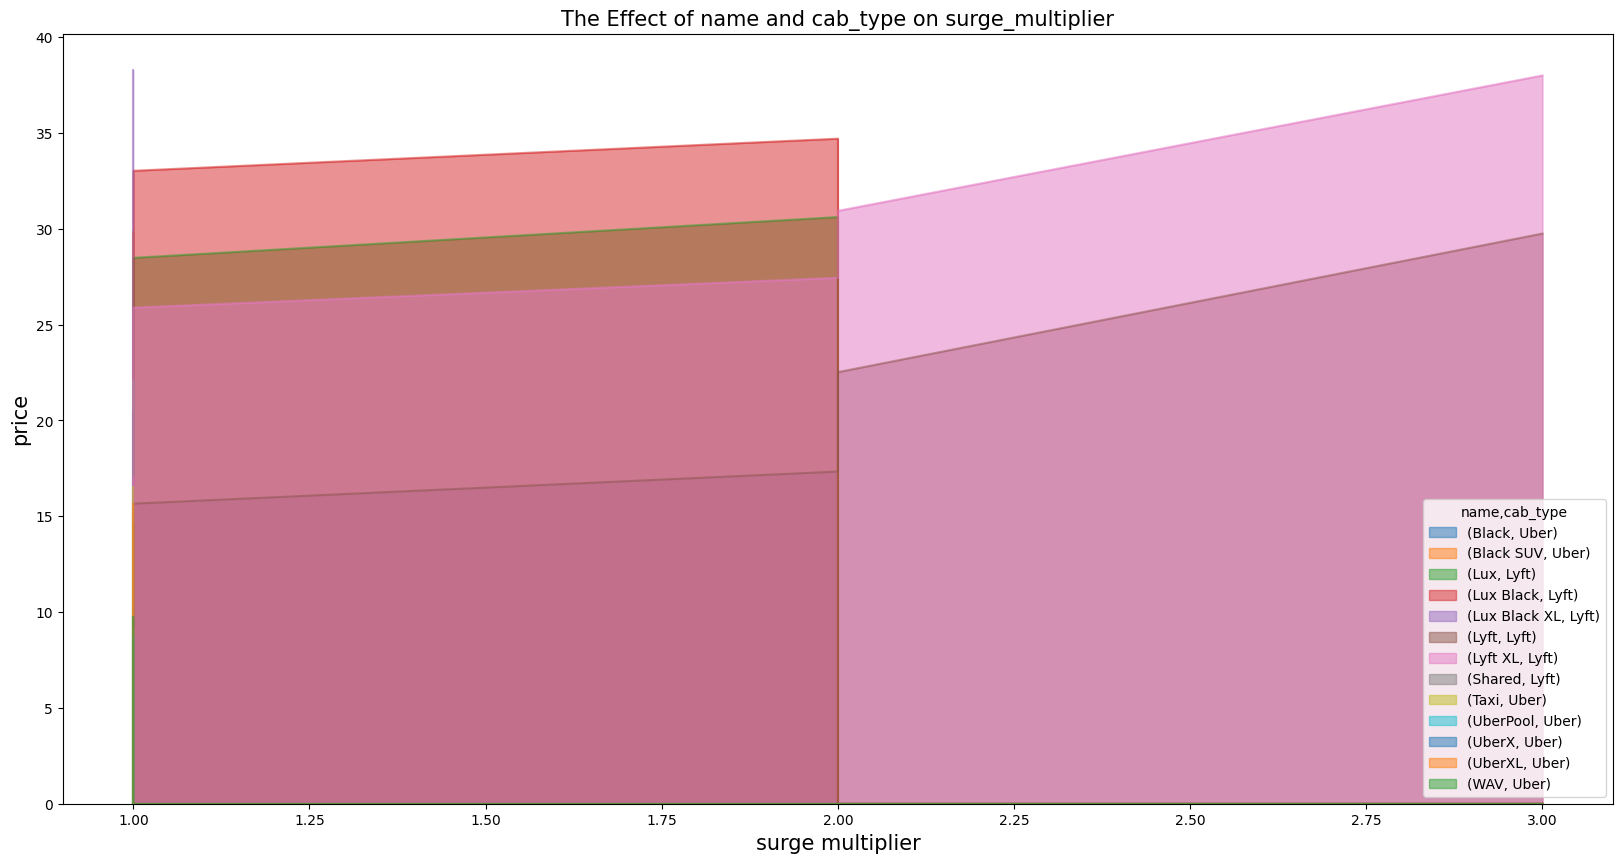

In [80]:
surge_price.plot(kind='area',
                stacked=False,
                figsize=(20,10)
                )
plt.title('The Effect of name and cab_type on surge_multiplier', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.xlabel('surge multiplier', fontsize=15)

plt.show()

Based on visualization data above, we can make a conclusion that:
- The type of car and the type of taxi ordered affect the fare multiplier, so that the price obtained can be more expensive.
- The uber type only experienced a fare multiplier of up to 1.0.
- The largest fare multiplier is the Lyft XL type with a price of 41 USD at a multiplier of 3.00.

## **Data Pre-Processing**

Uses one hot encoding because it is compatible with linear models and can prevent the model from assuming an ordinal relationship between categories.

In [81]:
# Karena pada independent variabel terdapat data categorical, maka akan dilakukan LabelEncoder terlebih dahulu
le = LabelEncoder()

# Mendefinisikan variabel independent (X) dan variabel dependent (y)
X = df_without_outliers.copy().drop("price",axis=1).apply(le.fit_transform)
y = df_without_outliers.copy()["price"]

# Split dataframe menjadi data training dan data testing dengan ratio 70:30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1221)
print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

# Karena setiap variabel independen memiliki scale yang berbeda, maka akan dilakukan standarisasi dengan *StandardScaler*
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Training dataset	: 548071
Testing dataset		: 137018


## **Model Definition and Training**

Let's try to create and train basic linear regression model

In [82]:
# Create and train basic linear regression model first
from sklearn.linear_model import LinearRegression

base_model = LinearRegression()
base_model.fit(scaled_X_train,y_train)

# Use the newly created linear regression model to predict the *price*
base_pred = base_model.predict(scaled_X_test)

# Evaluate all the models with more details using other metrics in the next section
from sklearn.metrics import r2_score

r2_score(y_test,base_pred) 

0.513675333894221

#### **Polynomial Regression ($d=2$)**

In [83]:
# Transform independent variable for polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly_2_X = PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

# Split DataFrame (data training and data testing, ratio 80:20) and standardize the transformed independent variables.
poly_2_X_train,poly_2_X_test,y_train,y_test = train_test_split(poly_2_X,y,test_size=0.2,random_state=1221)
scaled_poly_2_X_train = scaler.fit_transform(poly_2_X_train)
scaled_poly_2_X_test = scaler.transform(poly_2_X_test)

# Create and train model polynomial regression (d=2)
poly_2_model = LinearRegression()
poly_2_model.fit(scaled_poly_2_X_train,y_train)

# Predict the price and it will be seen by the values of R-Square
poly_2_pred = poly_2_model.predict(scaled_poly_2_X_test)
r2_score(y_test,poly_2_pred)

0.7514511966287081

#### **Polynomial Regression ($d=3$)**

In [84]:
# Transform independent variable for polynomial regression model (d=3)
poly_3_X = PolynomialFeatures(degree=3,include_bias=False).fit_transform(X)

# Split DataFrame (data training and data testing, ratio 80:20) and standardize the transformed independent variables.
poly_3_X_train,poly_3_X_test,y_train,y_test = train_test_split(poly_3_X,y,test_size=0.2,random_state=1221)
scaled_poly_3_X_train = scaler.fit_transform(poly_3_X_train)
scaled_poly_3_X_test = scaler.transform(poly_3_X_test)

# Create and train model polynomial regression (d=3)
poly_3_model = LinearRegression()
poly_3_model.fit(scaled_poly_3_X_train,y_train)

# Predict the price and it will be seen by the values of R-Square
poly_3_pred = poly_3_model.predict(scaled_poly_3_X_test)
r2_score(y_test,poly_3_pred)

0.9564719959986241

## **Models Evaluation**

Evaluate the models using metrics as follows:
- $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $
- $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $
- $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

Based on the plot below, it can be seen that the polynomial regression ($d=3$) model has the lowest MAE and RMSE and highest $R^2$ score.

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

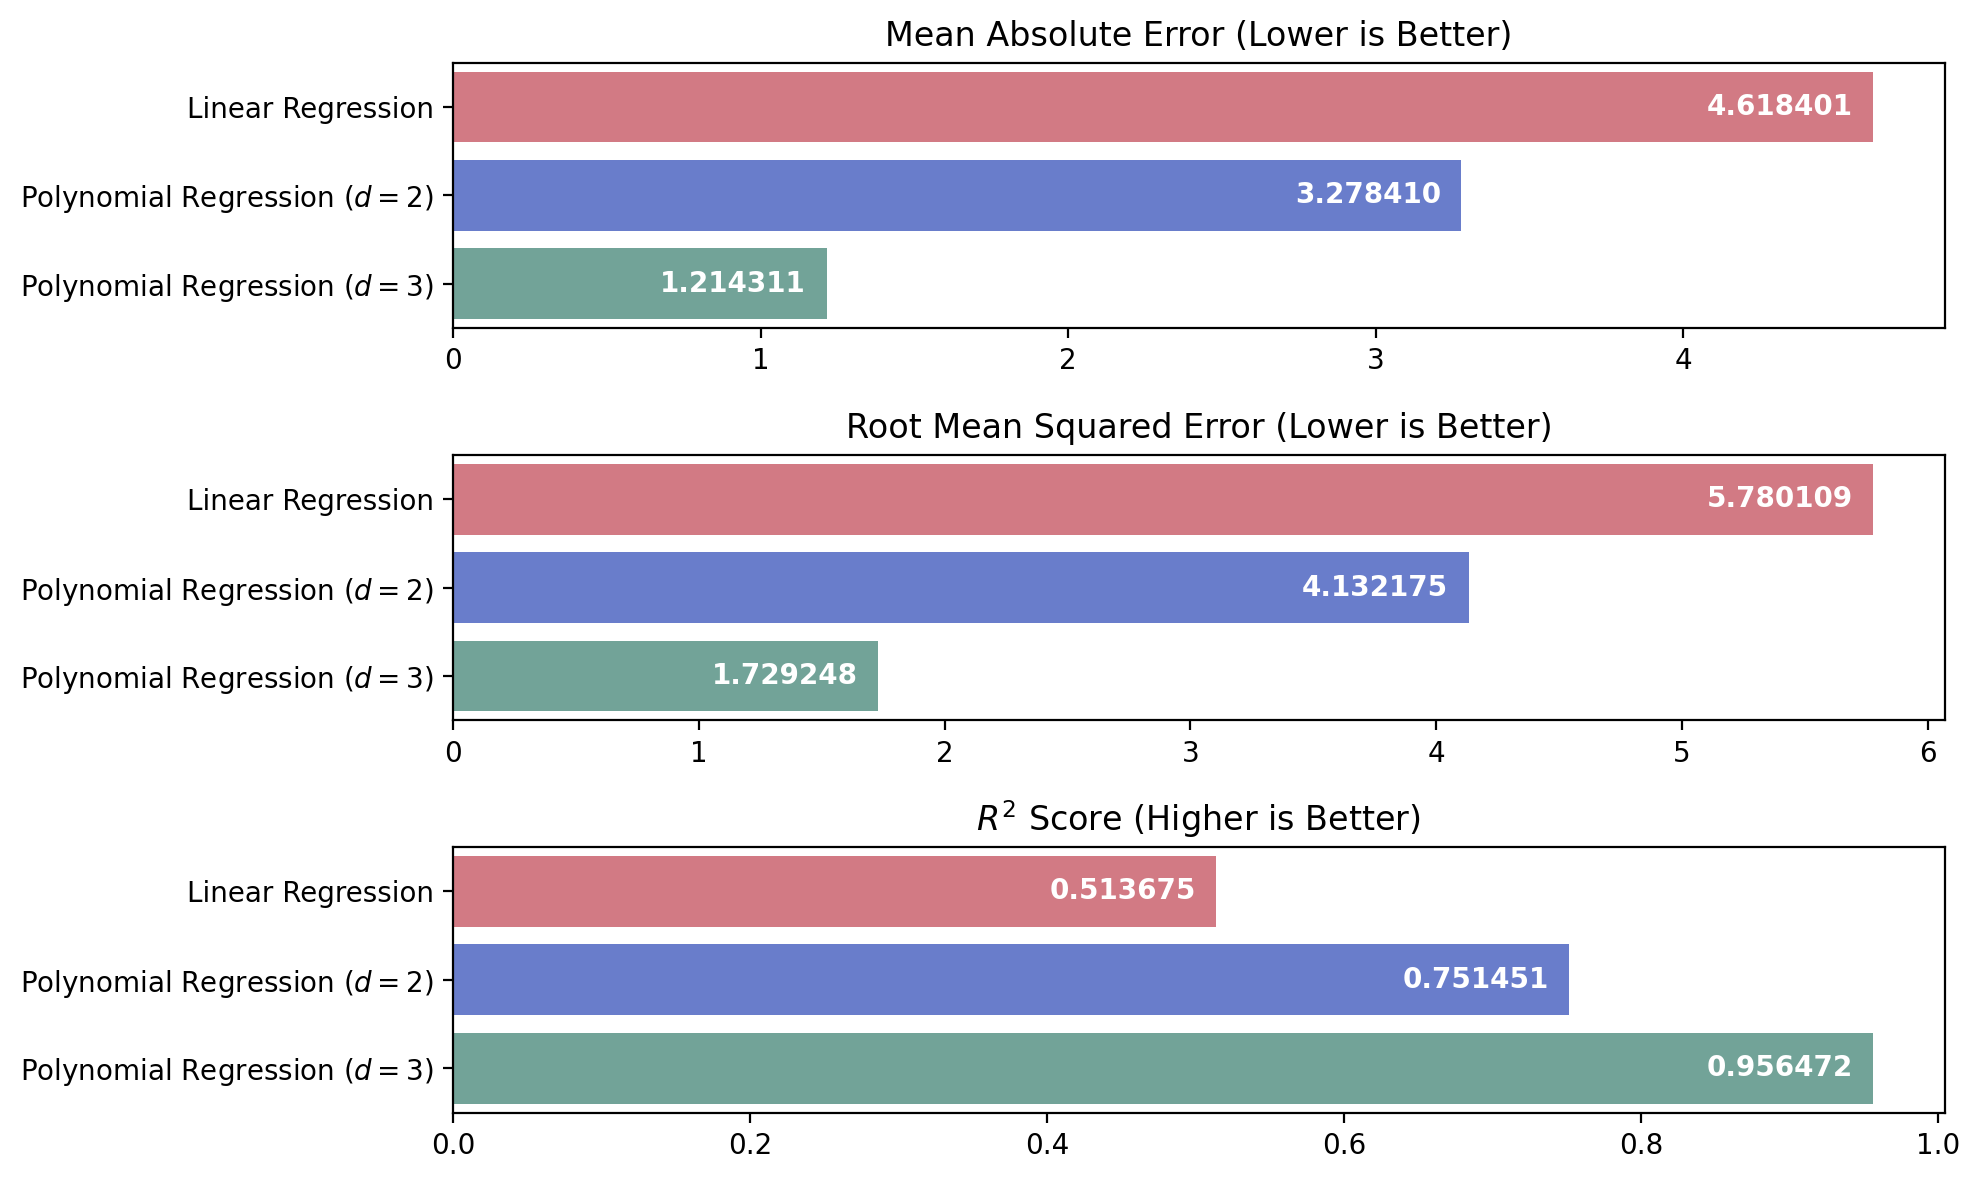

In [85]:
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred),mean_absolute_error(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred)),np.sqrt(mean_squared_error(y_test,poly_3_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred),r2_score(y_test,poly_3_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$","Polynomial Regression $(d=3)$"],
    palette=["#E06C78","#5874DC","#6AAB9C"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

Based on the plot above, we can see that polynomial regression model ($d=3$) is best model because it has lowest value for MAE and RMSE and highest score of ($R^2$) 

Reference: [Stack Overflow](https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib)

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

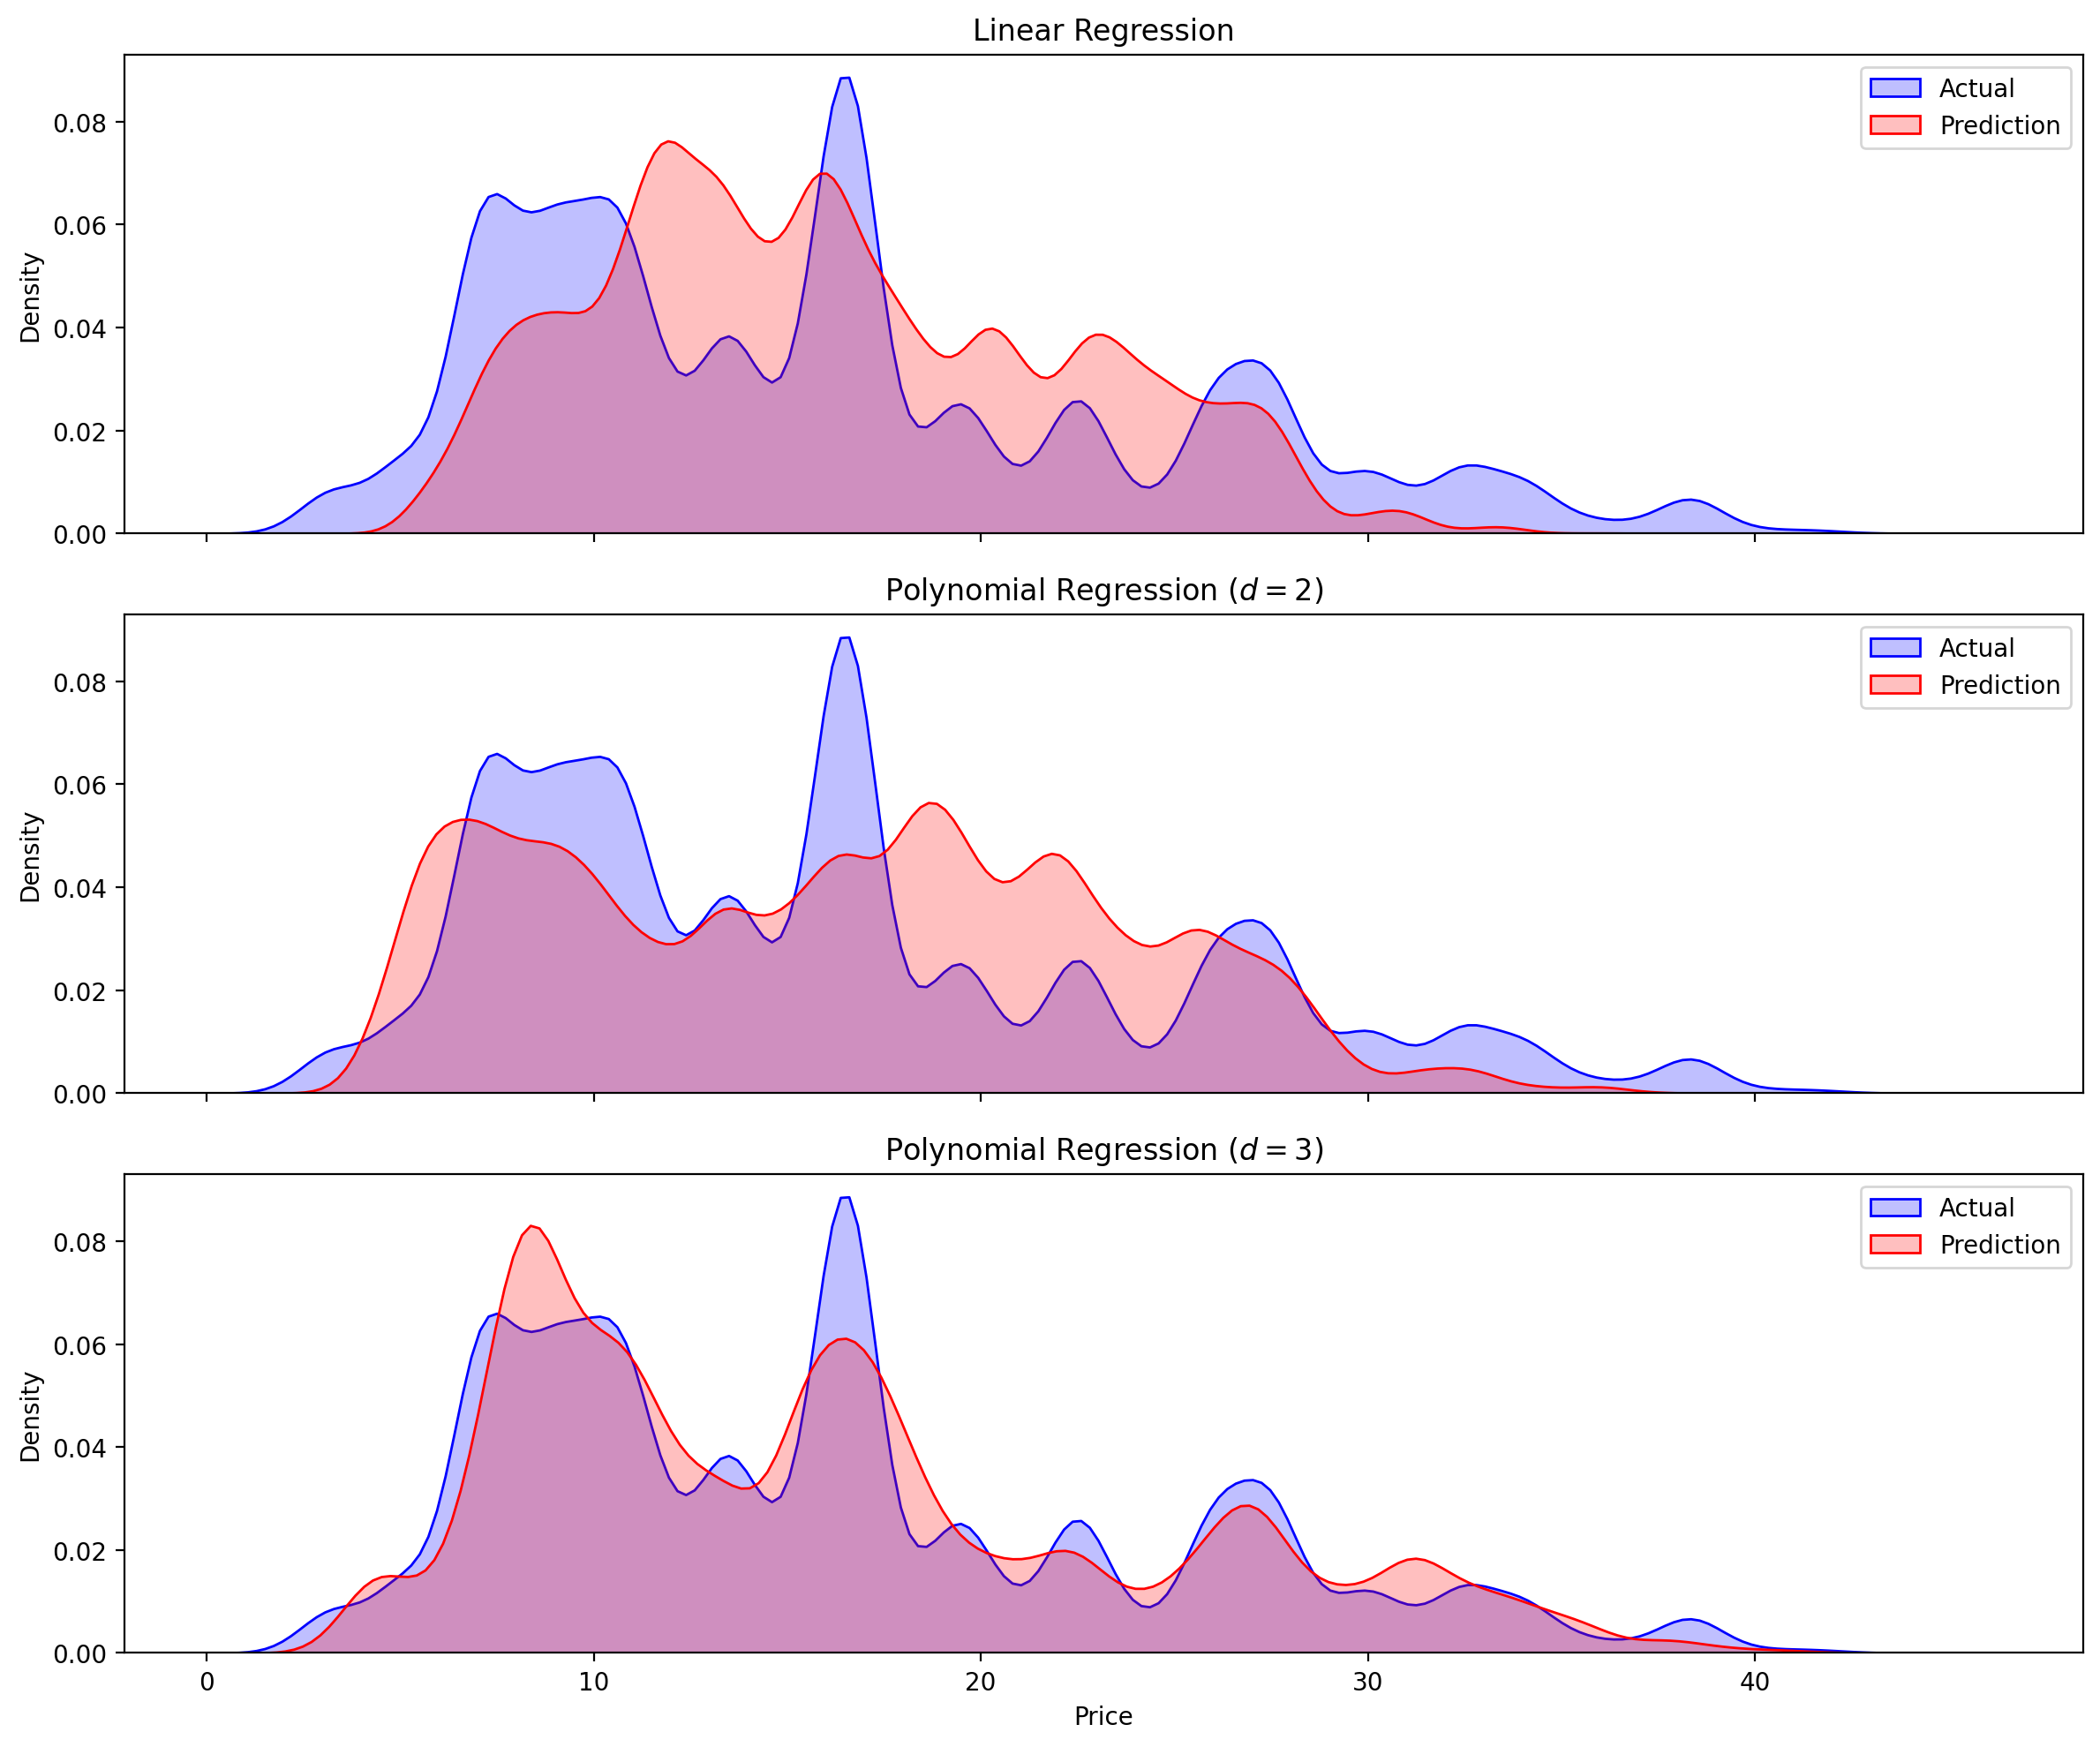

In [86]:
fig,ax = plt.subplots(figsize=(12,10),dpi=200,nrows=3,ncols=1,sharex=True)

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[0])
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction",ax=ax[0])
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Price")
ax[0].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[1])
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction",ax=ax[1])
ax[1].set_title("Polynomial Regression $(d=2)$")
ax[1].set_xlabel("Price")
ax[1].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[2])
sns.kdeplot(poly_3_pred,color="red",fill=True,label="Prediction",ax=ax[2])
ax[2].set_title("Polynomial Regression $(d=3)$")
ax[2].set_xlabel("Price")
ax[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

Based on plot above, it can be see that polynomial regression ($d=3$) is the best model because of the most accurate prediction

Put all of the predictions in a single dataframe to see the numbers clearly.

In [87]:
pd.DataFrame({
    "Actual":y_test,
    "Linear Regression Prediction":base_pred,
    "Polynomial Regression (d = 2) Prediction":poly_2_pred,
    "Polynomial Regression (d = 3) Prediction":poly_3_pred
}).reset_index(drop=True)

,Actual,Linear Regression Prediction,Polynomial Regression (d = 2) Prediction,Polynomial Regression (d = 3) Prediction
0,13.5,14.449638,14.482929,13.518475
1,13.5,14.432659,14.973163,13.571820
2,16.5,17.924286,18.709003,18.096722
3,22.5,20.473125,27.753925,25.715130
4,13.5,20.108449,16.134296,13.407513
...,...,...,...,...
137013,34.0,33.186859,35.886005,35.612530
137014,7.5,14.854567,11.808857,8.486371
137015,11.0,14.296934,9.452656,9.562176
137016,10.5,11.251089,11.307636,9.944378


After all of the models have been evaluated, it's time to create the final models by retraining them with the whole dataframe. Let's start with the basic linear regression one and write its equation.

In [88]:
final_base_model = LinearRegression().fit(X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]
y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_base_model.intercept_,6)
for i in range(len(X.columns)):
    sums += x_symbol[i] * np.round(final_base_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 8.640223*(cabtype) + 0.019841*(destination) + 0.02329*(distance) - 1.562186*(name) + 0.763309*(productid) + 0.033254*(source) + 2.916087*(surgemultiplier) + 11.593219)

Create the final polynomial regression ($d =2$) model. As it can be seen, the model starts getting much more complex.

In [89]:
final_poly_2_model = LinearRegression().fit(poly_2_X,y)

x_symbol = [sp.Symbol(f"({i})") for i in X.columns.str.replace("_","")]

n = 1
x_symbol_ = []
for i in x_symbol:
    x_symbol_.append(i**2)
    for j in x_symbol[n:]:
        x_symbol_.append(i * j)
    n += 1
x_symbol = x_symbol + x_symbol_

y_symbol = sp.Symbol("\hat{price}")

sums = np.round(final_poly_2_model.intercept_,6)
for i in range(poly_2_X.shape[-1]):
    sums += x_symbol[i] * np.round(final_poly_2_model.coef_[i],6)

sp.Eq(y_symbol,sums)

Eq(\hat{price}, 48.374942*(cabtype)**2 - 0.027852*(cabtype)*(destination) + 0.002037*(cabtype)*(distance) + 5.594688*(cabtype)*(name) - 20.692159*(cabtype)*(productid) + 0.009681*(cabtype)*(source) + 48.374942*(cabtype) - 0.005822*(destination)**2 - 0.000372*(destination)*(distance) - 0.003872*(destination)*(name) - 0.000667*(destination)*(productid) - 0.00946*(destination)*(source) + 0.00693*(destination)*(surgemultiplier) + 0.246475*(destination) - 8.0e-6*(distance)**2 - 0.001987*(distance)*(name) + 0.000644*(distance)*(productid) - 0.00025*(distance)*(source) + 0.004069*(distance)*(surgemultiplier) + 0.037959*(distance) - 0.034023*(name)**2 + 0.433956*(name)*(productid) - 0.004932*(name)*(source) - 0.004704*(name)*(surgemultiplier) - 6.355554*(name) - 1.314001*(productid)**2 + 0.00445*(productid)*(source) + 0.169988*(productid)*(surgemultiplier) + 23.655437*(productid) - 0.007616*(source)**2 - 0.016665*(source)*(surgemultiplier) + 0.203331*(source) - 0.31509*(surgemultiplier)**2 + 1

Create the final polynomial regression ($ d = 3$) model. To reduce the computational cost, it's best to skip writing the equation for this one.

In [90]:
final_poly_3_model = LinearRegression().fit(poly_3_X,y)

Save all the final models for future use.

In [91]:
from joblib import dump

final_models = [final_base_model,final_poly_2_model,final_poly_3_model]
file_names = ["linear_regression","polynomial_2d_regression","polynomial_3d_regression"]

for i,j in zip(final_models,file_names):
    dump(i,j + ".joblib")
    print(f"{j}.joblib has been saved successfully!")

linear_regression.joblib has been saved successfully!
polynomial_2d_regression.joblib has been saved successfully!
polynomial_3d_regression.joblib has been saved successfully!


## **Conclusion**

Based on the analysis above, it can be concluded that the best model to predict the prices of Uber and Lyft transportation services is polynomial regression where ($d=3$) since it has the lowest MAE and RMSE and highest score among other models. In addition, its prediction is close to the actual prices.